In [1]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import pickle
from joblib import dump,load
from sklearn.metrics import classification_report,f1_score,recall_score,precision_score
import shap
from matplotlib import pyplot
from sklearn.ensemble import GradientBoostingClassifier


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
seen='./seen_split/'
unseen='./'

In [3]:
##unseen partition

In [6]:
X=pd.read_csv(unseen+str(0)+'_imdb_train_encode.csv').reindex(columns=['outputscore'])
X=X.loc[:,~X.columns.str.match("Unnamed")]
val=pd.read_csv(unseen+str(0)+'_imdb_val_encode.csv').reindex(columns=X.columns)
val=val.fillna(0)
X=X.append(val)
vlabel=pd.read_csv(unseen+str(0)+'_imdb_val_label.csv')['label']
y=pd.read_csv(unseen+str(0)+'_imdb_train_label.csv')['label']
y=y.append(vlabel)
testlabel=pd.read_csv(unseen+str(0)+'_imdb_test_label.csv')['label']
test=pd.read_csv(unseen+str(0)+'_imdb_test_encode.csv').reindex(columns=X.columns)
test=test.fillna(0)
#clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.5,max_depth=20, random_state=0).fit(X, y)
clf=RandomForestClassifier(max_depth=10,bootstrap=False, class_weight={1:10},min_samples_leaf=20,n_estimators=100,criterion='entropy').fit(X,y)
pre=clf.predict(test)
print(sum(pre))
print(sum(testlabel))
print('the f1 score is',f1_score(testlabel,pre))

5
8
the f1 score is 0.15384615384615385


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


In [ ]:
#XG Boost

In [59]:
for i in range(5):
    X=pd.read_csv(unseen+str(i)+'_imdb_train_encode.csv')
    X=X.loc[:,~X.columns.str.match("Unnamed")]
    val=pd.read_csv(unseen+str(i)+'_imdb_val_encode.csv').reindex(columns=X.columns)
    val=val.fillna(0)
    X=X.append(val)
    vlabel=pd.read_csv(unseen+str(i)+'_imdb_val_label.csv')['label']
    y=pd.read_csv(unseen+str(i)+'_imdb_train_label.csv')['label']
    y=y.append(vlabel)
    testlabel=pd.read_csv(unseen+str(i)+'_imdb_test_label.csv')['label']
    test=pd.read_csv(unseen+str(i)+'_imdb_test_encode.csv').reindex(columns=X.columns)
    test.fillna(0)
    clfG = GradientBoostingClassifier()
    n_estimators=[100,150,200,230]
    ones=[30,35,40,50,100,200,300,400]
#     minSampleLeaf=[30,40,50,80,100,200,250]
    max_depth=[10,15,20]
    lr=[0.5,0.8,0.9]
    #'min_samples_leaf':minSampleLeaf,
    parameter={'learning_rate':lr,'max_depth':max_depth,'n_estimators':n_estimators}
    clfG=GridSearchCV(clf,parameter,scoring="f1",cv=5)
    clfG.fit(X,y)
    with open(unseen+'model/'+str(i)+'model_pkl', 'wb') as files:
        pickle.dump(clfG, files)

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be re

In [60]:
allf1=0
allrecall=0
allprecision=0
for i in range(5):    
    with open(unseen+'/model/'+str(i)+'model_pkl' , 'rb') as f:
        X=pd.read_csv(unseen+str(i)+'_imdb_train_encode.csv')
        X=X.loc[:,~X.columns.str.match("Unnamed")]
        testlabel=pd.read_csv(unseen+str(i)+'_imdb_test_label.csv')['label']
        test=pd.read_csv(unseen+str(i)+'_imdb_test_encode.csv').reindex(columns=X.columns)
        test=test.fillna(0)
        print(test)
        clfG = pickle.load(f)
        pre=clfG.predict(test)
        print(sum(pre))
        print(sum(testlabel))
        print('the f1 score is',f1_score(testlabel,pre))
        print('the precision score is',precision_score(testlabel,pre))
        print('the recall score is ',recall_score(testlabel,pre))
        allf1+=f1_score(testlabel,pre)
        allrecall+=recall_score(testlabel,pre)
        allprecision+=precision_score(testlabel,pre)
        print(clfG.best_params_)
        print(clfG.best_score_)
print('the average f1 of IMDB is',allf1/5)
print('the average recall score',allrecall/5)
print('the average precision score',allprecision/5)

     primary key_x  foreign key_x  size_x  primary key_y  foreign key_y  \
0                0              0      40              1              0   
1                0              0      40              0              1   
2                0              0      40              0              0   
3                0              0      40              0              0   
4                0              0      40              0              0   
..             ...            ...     ...            ...            ...   
416              0              0      20              1              0   
417              0              0      20              1              0   
418              0              0      20              1              0   
419              0              0      20              0              0   
420              0              0      20              0              1   

     size_y  YYYY_x  array_x  boolean_x  integer_x  string_x  array_y  \
0         6     0.0       

# SHAP

In [15]:
X=pd.read_csv(unseen+str(0)+'_imdb_train_encode.csv')
X=X.loc[:,~X.columns.str.match("Unnamed")]
val=pd.read_csv(unseen+str(0)+'_imdb_val_encode.csv').reindex(columns=X.columns)
val=val.fillna(0)
X=X.append(val)
vlabel=pd.read_csv(unseen+str(0)+'_imdb_val_label.csv')['label']
y=pd.read_csv(unseen+str(0)+'_imdb_train_label.csv')['label']
y=y.append(vlabel)
testlabel=pd.read_csv(unseen+str(0)+'_imdb_test_label.csv')['label']
test=pd.read_csv(unseen+str(0)+'_imdb_test_encode.csv').reindex(columns=X.columns)
test=test.fillna(0)

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


In [16]:
test.columns=test.columns.str.replace("_x","_1")
test.columns=test.columns.str.replace("_y","_2")
X.columns=X.columns.str.replace("_x","_1")
X.columns=X.columns.str.replace("_y","_2")
X
X=X.rename(columns={'YYYY_1':'year_1'})
test=test.rename(columns={'YYYY_1':'year_1'})
X
# temp=temp.str.replace("_y","_2")
# temp
# print(temp)
# X.rename(columns={'primary key_x':'primary key_1','foreign key_x''foreign key_1', 'size_x':'size_1', 
#         'primary key_y':'primary key_2',
#        'foreign key_y':'foreign key_2', 'size_y':'size_2', 'YYYY_x':'YYYY_1', 'array_x':'array_1', 'boolean_x':'boolean_1',
#        'integer_x':'integer_1', 'string_x':'string_1', 'array_y':'array_2', 'boolean_y':'boolean_2', 'float_''float_2', 'integer_2',
#        'string_2', 'timestamp_2'})

,primary key_1,foreign key_1,size_1,primary key_2,foreign key_2,size_2,year_1,array_1,boolean_1,integer_1,string_1,array_2,boolean_2,float_2,integer_2,string_2,timestamp_2,outputscore
0,0,0,13,0,1,20,1,0,0.0,0,0.0,0,0,0,1,0,0,0.009987
1,0,0,13,0,1,200,1,0,0.0,0,0.0,0,0,0,1,0,0,0.005950
2,0,0,13,0,0,15,1,0,0.0,0,0.0,0,0,0,0,1,0,0.000646
3,0,0,13,0,0,13,1,0,0.0,0,0.0,0,0,0,0,0,1,0.000038
4,0,0,13,0,0,13,1,0,0.0,0,0.0,0,0,0,0,0,1,0.000012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,0,0,50,1,0,650,0,0,0.0,1,0.0,0,0,0,1,0,0,0.002017
176,0,0,50,0,0,15,0,0,0.0,1,0.0,0,0,0,0,1,0,0.000155
177,0,0,50,0,1,2,0,0,0.0,1,0.0,0,0,0,1,0,0,0.004720
178,0,0,50,1,0,6,0,0,0.0,1,0.0,0,0,0,1,0,0,0.012418


{'max_depth': 10, 'min_samples_leaf': 30, 'n_estimators': 200}
the f1 score is 0.15384615384615385


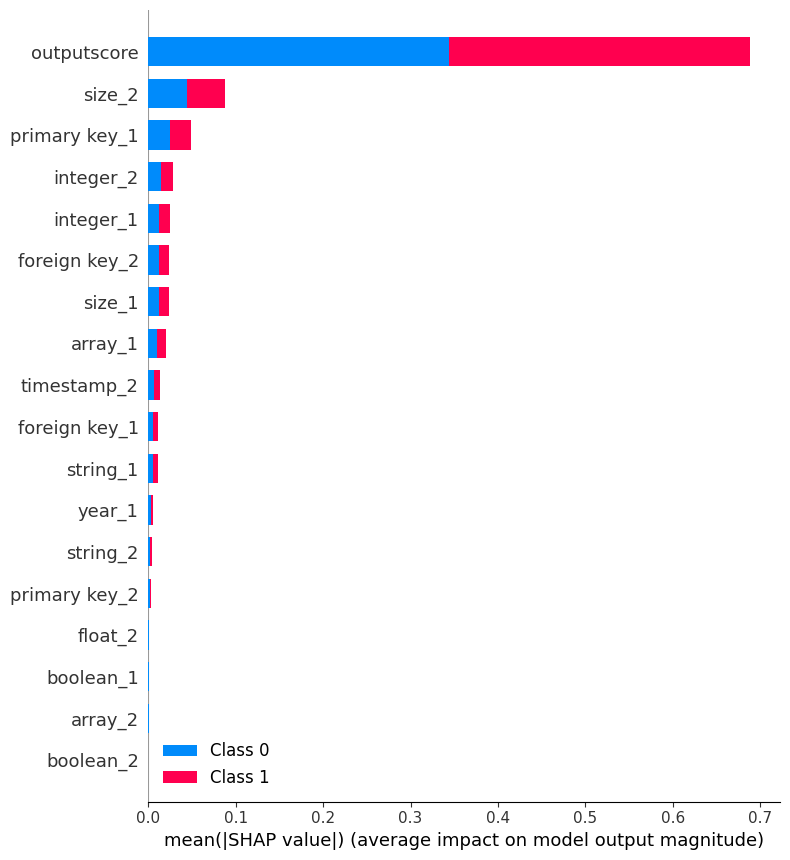

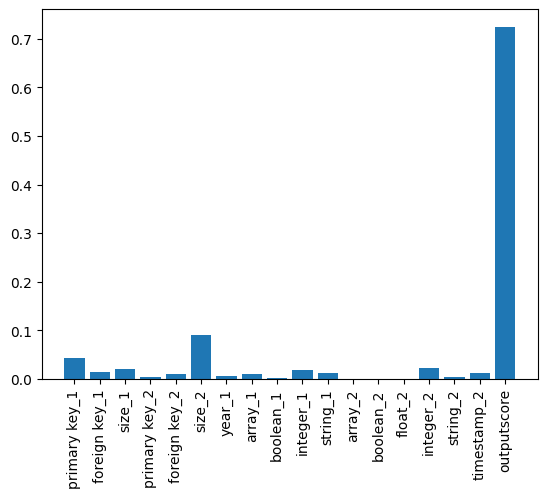

In [17]:
with open('./model/'+str(0)+'model_pkl' , 'rb') as f:
    model=pickle.load(f)
    print(model.best_params_)
    clf = RandomForestClassifier(criterion='entropy',bootstrap=False,max_depth=model.best_params_['max_depth'],min_samples_leaf=model.best_params_['min_samples_leaf'],class_weight='balanced', n_estimators=model.best_params_['n_estimators'])
    clf.fit(X,y)
    pre=clf.predict(test)
    print('the f1 score is',f1_score(testlabel,pre))
    shap_values = shap.TreeExplainer(clf).shap_values(X)
#     print(shap_values)

    shap.summary_plot(shap_values, X)
#     shap.summary_plot(shap_values[0], X.values, feature_names = X.columns)
    pyplot.xticks( rotation='vertical')
    importance = clf.feature_importances_
    pyplot.bar(X.columns, importance)

In [ ]:
#Random Forest

In [11]:

for i in range(5):
    X=pd.read_csv(unseen+str(i)+'_imdb_train_encode.csv')
    X=X.loc[:,~X.columns.str.match("Unnamed")]
    val=pd.read_csv(unseen+str(i)+'_imdb_val_encode.csv').reindex(columns=X.columns)
    val=val.fillna(0)
    X=X.append(val)
    vlabel=pd.read_csv(unseen+str(i)+'_imdb_val_label.csv')['label']
    y=pd.read_csv(unseen+str(i)+'_imdb_train_label.csv')['label']
    y=y.append(vlabel)
    testlabel=pd.read_csv(unseen+str(i)+'_imdb_test_label.csv')['label']
    test=pd.read_csv(unseen+str(i)+'_imdb_test_encode.csv').reindex(columns=X.columns)
    test.fillna(0)
    clf = RandomForestClassifier(class_weight='balanced',criterion='entropy',bootstrap=False)
    n_estimators=[150,200,250,110]
#     ones=[10,30,35,40,50,100]
    minSampleLeaf=[30,35,40,50,80]
    max_depth=[10,15,20,7]
    #,'class_weight':[{1:classOne} for classOne in ones ]
    parameter={'max_depth':max_depth,'min_samples_leaf':minSampleLeaf,'n_estimators':n_estimators}
    clfG=GridSearchCV(clf,parameter,scoring="f1",cv=5)
    clfG.fit(X,y)
    with open(unseen+'model/'+str(i)+'model_pkl', 'wb') as files:
        pickle.dump(clfG, files)

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be re

In [18]:
allf1=0
allrecall=0
allprecision=0
for i in range(5):    
    with open(unseen+'/model/'+str(i)+'model_pkl' , 'rb') as f:
        X=pd.read_csv(unseen+str(i)+'_imdb_train_encode.csv')
        X=X.loc[:,~X.columns.str.match("Unnamed")]
        testlabel=pd.read_csv(unseen+str(i)+'_imdb_test_label.csv')['label']
        test=pd.read_csv(unseen+str(i)+'_imdb_test_encode.csv').reindex(columns=X.columns)
        test=test.fillna(0)
        print(test)
        clfG = pickle.load(f)
        pre=clfG.predict(test)
        print(sum(pre))
        print(sum(testlabel))
        print('the f1 score is',f1_score(testlabel,pre))
        print('the precision score is',precision_score(testlabel,pre))
        print('the recall score is ',recall_score(testlabel,pre))
        allf1+=f1_score(testlabel,pre)
        allrecall+=recall_score(testlabel,pre)
        allprecision+=precision_score(testlabel,pre)
        print(clfG.best_params_)
        print(clfG.best_score_)
print('the average f1 of IMDB is',allf1/5)
print('the average recall score',allrecall/5)
print('the average precision score',allprecision/5)

     primary key_x  foreign key_x  size_x  primary key_y  foreign key_y  \
0                0              0      20              0              1   
1                0              0      20              1              0   
2                0              0      20              0              0   
3                0              0      20              1              0   
4                0              0      20              0              0   
..             ...            ...     ...            ...            ...   
416              0              0      15              0              0   
417              0              0      15              0              0   
418              0              0      15              0              1   
419              0              0      15              0              0   
420              0              0      15              0              0   

     size_y  YYYY_x  array_x  boolean_x  integer_x  string_x  array_y  \
0        20     0.0       

{'max_depth': 7, 'min_samples_leaf': 30, 'n_estimators': 200}
0.6341357466063349
the average f1 of IMDB is 0.13256704080233492
the average recall score 0.125
the average precision score 0.1713131313131313


In [19]:

for i in range(5):
    X=pd.read_csv(unseen+str(i)+'_imdb_train_encode.csv').reindex(columns=['outputscore'])
    X=X.loc[:,~X.columns.str.match("Unnamed")]
    val=pd.read_csv(unseen+str(i)+'_imdb_val_encode.csv').reindex(columns=X.columns)
    val=val.fillna(0)    
    X=X.append(val)
    vlabel=pd.read_csv(unseen+str(i)+'_imdb_val_label.csv')['label']
    y=pd.read_csv(unseen+str(i)+'_imdb_train_label.csv')['label']
    y=y.append(vlabel)
    testlabel=pd.read_csv(unseen+str(i)+'_imdb_test_label.csv')['label']
    test=pd.read_csv(unseen+str(i)+'_imdb_test_encode.csv').reindex(columns=X.columns)
    clf = RandomForestClassifier(criterion='entropy',bootstrap=False)
    n_estimators=[150,200,250,110,80]
#     ones=[5,7,10,20,30,15,50]
    minSampleLeaf=[5,10,20,30,35,40,50]
    max_depth=[10,15,20,7,5]
    #'class_weight':[{1:classOne} for classOne in ones ],
    parameter={'class_weight':[{1:classOne} for classOne in ones ],'max_depth':max_depth,'min_samples_leaf':minSampleLeaf,'n_estimators':n_estimators}
    clfG=GridSearchCV(clf,parameter,scoring="f1",cv=5)
    clfG.fit(X,y)
    with open(unseen+'model/'+str(i)+'output_model_pkl', 'wb') as files:
        pickle.dump(clfG, files)

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be re

In [20]:
allf1=0
allrecall=0
allprecision=0
for i in range(5):    
    with open(unseen+'model/'+str(i)+'output_model_pkl' , 'rb') as f:
        X=pd.read_csv(unseen+str(i)+'_imdb_train_encode.csv').reindex(columns=['outputscore'])
        X=X.loc[:,~X.columns.str.match("Unnamed")]
        testlabel=pd.read_csv(unseen+str(i)+'_imdb_test_label.csv')['label']
        test=pd.read_csv(unseen+str(i)+'_imdb_test_encode.csv').reindex(columns=X.columns)
        test=test.fillna(0)
        clfG = pickle.load(f)
        pre=clfG.predict(test)
        print(sum(pre))
        print(sum(testlabel))
        print('the f1 score is',f1_score(testlabel,pre))
        print('the precision score is',precision_score(testlabel,pre))
        print('the recall score is ',recall_score(testlabel,pre))
        allf1+=f1_score(testlabel,pre)
        allrecall+=recall_score(testlabel,pre)
        allprecision+=precision_score(testlabel,pre)
        print(clfG.best_params_)
        print(clfG.best_score_)
print('the average f1 of IMDB is',allf1/5)
print('the average recall score',allrecall/5)
print('the average precision score',allprecision/5)

0
8
the f1 score is 0.0
the precision score is 0.0
the recall score is  0.0
{'class_weight': {1: 5}, 'max_depth': 10, 'min_samples_leaf': 10, 'n_estimators': 150}
0.8775119617224881
0
8
the f1 score is 0.0
the precision score is 0.0
the recall score is  0.0
{'class_weight': {1: 5}, 'max_depth': 10, 'min_samples_leaf': 10, 'n_estimators': 150}
0.8530364372469634
0
8
the f1 score is 0.0
the precision score is 0.0
the recall score is  0.0
{'class_weight': {1: 5}, 'max_depth': 10, 'min_samples_leaf': 10, 'n_estimators': 150}
0.8433230134158926
1
8
the f1 score is 0.0
the precision score is 0.0
the recall score is  0.0
{'class_weight': {1: 5}, 'max_depth': 10, 'min_samples_leaf': 10, 'n_estimators': 150}
0.8057971014492754
4
8
the f1 score is 0.16666666666666666
the precision score is 0.25
the recall score is  0.125
{'class_weight': {1: 7}, 'max_depth': 10, 'min_samples_leaf': 40, 'n_estimators': 150}
0.7707993966817496
the average f1 of IMDB is 0.03333333333333333
the average recall score 

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.


In [23]:

for i in range(5):
    X=pd.read_csv(unseen+str(i)+'_imdb_train_encode.csv').drop(columns=['outputscore'])
    X=X.loc[:,~X.columns.str.match("Unnamed")]
    val=pd.read_csv(unseen+str(i)+'_imdb_val_encode.csv').reindex(columns=X.columns)
    val=val.fillna(0)
    X=X.append(val)
    print(X)
    vlabel=pd.read_csv(unseen+str(i)+'_imdb_val_label.csv')['label']
    y=pd.read_csv(unseen+str(i)+'_imdb_train_label.csv')['label']
    y=y.append(vlabel)
    testlabel=pd.read_csv(unseen+str(i)+'_imdb_test_label.csv')['label']
    test=pd.read_csv(unseen+str(i)+'_imdb_test_encode.csv').reindex(columns=X.columns)
    clf = RandomForestClassifier(criterion='entropy',bootstrap=False,class_weight='balanced')
    n_estimators=[150,200,250,110]
    ones=[10,20,30,35,40,50,100]
    minSampleLeaf=[30,35,40,50,80,100,200]
    max_depth=[10,15,20]
    #'class_weight':[{1:classOne} for classOne in ones ],
    parameter={'max_depth':max_depth,'min_samples_leaf':minSampleLeaf,'n_estimators':n_estimators}
    clfG=GridSearchCV(clf,parameter,scoring="f1",cv=5)
    clfG.fit(X,y)
    with open(unseen+'model/'+str(i)+'constraint_model_pkl', 'wb') as files:
        pickle.dump(clfG, files)

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


     primary key_x  foreign key_x  size_x  primary key_y  foreign key_y  \
0                0              0      13              0              1   
1                0              0      13              0              1   
2                0              0      13              0              0   
3                0              0      13              0              0   
4                0              0      13              0              0   
..             ...            ...     ...            ...            ...   
175              0              0      50              1              0   
176              0              0      50              0              0   
177              0              0      50              0              1   
178              0              0      50              1              0   
179              0              0      50              0              0   

     size_y  YYYY_x  array_x  boolean_x  integer_x  string_x  array_y  \
0        20       1       

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


     primary key_x  foreign key_x  size_x  primary key_y  foreign key_y  \
0                0              0      13              0              1   
1                0              0      13              0              1   
2                0              0      13              0              0   
3                0              0      13              0              0   
4                0              0      13              0              0   
..             ...            ...     ...            ...            ...   
175              0              0      50              1              0   
176              0              0      50              0              0   
177              0              0      50              0              1   
178              0              0      50              1              0   
179              0              0      50              0              0   

     size_y  YYYY_x  array_x  boolean_x  integer_x  string_x  array_y  \
0        20       1       

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


     primary key_x  foreign key_x  size_x  primary key_y  foreign key_y  \
0                0              0      13              0              1   
1                0              0      13              0              1   
2                0              0      13              0              0   
3                0              0      13              0              0   
4                0              0      13              0              0   
..             ...            ...     ...            ...            ...   
175              0              0      50              1              0   
176              0              0      50              0              0   
177              0              0      50              0              1   
178              0              0      50              1              0   
179              0              0      50              0              0   

     size_y  YYYY_x  array_x  boolean_x  integer_x  string_x  array_y  \
0        20       1       

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


     primary key_x  foreign key_x  size_x  primary key_y  foreign key_y  \
0                0              0      13              0              1   
1                0              0      13              0              1   
2                0              0      13              0              0   
3                0              0      13              0              0   
4                0              0      13              0              0   
..             ...            ...     ...            ...            ...   
175              0              0      50              1              0   
176              0              0      50              0              0   
177              0              0      50              0              1   
178              0              0      50              1              0   
179              0              0      50              0              0   

     size_y  YYYY_x  array_x  boolean_x  integer_x  string_x  array_y  \
0        20       1       

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


     primary key_x  foreign key_x  size_x  primary key_y  foreign key_y  \
0                0              0      13              0              1   
1                0              0      13              0              1   
2                0              0      13              0              0   
3                0              0      13              0              0   
4                0              0      13              0              0   
..             ...            ...     ...            ...            ...   
175              0              0      50              1              0   
176              0              0      50              0              0   
177              0              0      50              0              1   
178              0              0      50              1              0   
179              0              0      50              0              0   

     size_y  YYYY_x  array_x  boolean_x  integer_x  string_x  array_y  \
0        20       1       

In [24]:
allf1=0
allrecall=0
allprecision=0
for i in range(5):    
    with open(unseen+'model/'+str(i)+'constraint_model_pkl' , 'rb') as f:
        X=pd.read_csv(unseen+str(i)+'_imdb_train_encode.csv').drop(columns=['outputscore'])
        X=X.loc[:,~X.columns.str.match("Unnamed")]
        testlabel=pd.read_csv(unseen+str(i)+'_imdb_test_label.csv')['label']
        test=pd.read_csv(unseen+str(i)+'_imdb_test_encode.csv').reindex(columns=X.columns)
        test=test.fillna(0)
        clfG = pickle.load(f)
        pre=clfG.predict(test)
        print(sum(pre))
        print(sum(testlabel))
        print('the f1 score is',f1_score(testlabel,pre))
        print('the precision score is',precision_score(testlabel,pre))
        print('the recall score is ',recall_score(testlabel,pre))
        allf1+=f1_score(testlabel,pre)
        allrecall+=recall_score(testlabel,pre)
        allprecision+=precision_score(testlabel,pre)
        print(clfG.best_params_)
        print(clfG.best_score_)
print('the average f1 of IMDB is',allf1/5)
print('the average recall score',allrecall/5)
print('the average precision score',allprecision/5)

20
8
the f1 score is 0.07142857142857144
the precision score is 0.05
the recall score is  0.125
{'max_depth': 20, 'min_samples_leaf': 30, 'n_estimators': 150}
0.1325344482366011
22
8
the f1 score is 0.06666666666666667
the precision score is 0.045454545454545456
the recall score is  0.125
{'max_depth': 20, 'min_samples_leaf': 30, 'n_estimators': 200}
0.1319627730294397
20
8
the f1 score is 0.07142857142857144
the precision score is 0.05
the recall score is  0.125
{'max_depth': 15, 'min_samples_leaf': 30, 'n_estimators': 200}
0.12806848324089704
22
8
the f1 score is 0.06666666666666667
the precision score is 0.045454545454545456
the recall score is  0.125
{'max_depth': 15, 'min_samples_leaf': 30, 'n_estimators': 150}
0.1301621259665484
21
8
the f1 score is 0.06896551724137931
the precision score is 0.047619047619047616
the recall score is  0.125
{'max_depth': 20, 'min_samples_leaf': 30, 'n_estimators': 200}
0.13628116253149725
the average f1 of IMDB is 0.06903119868637111
the average re